In [12]:
# Libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib


In [13]:
# Load Dataset
df = pd.read_csv("student_scores_selected_features.csv")

# Create performance_category based on average_score
if 'performance_category' not in df.columns:
    df['performance_category'] = pd.cut(
        df['average_score'],
        bins=[0, 60, 75, 100],
        labels=['Low', 'Average', 'Excellent'],
        include_lowest=True
    )


In [14]:
# Feaetures and target variable
target = "performance_category"

# Exclude target and any non-feature columns
features = [col for col in df.columns if col not in [target]]

X = df[features]
y = df[target]

# Encode labels (Low, Average, Excellent → 0,1,2)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [15]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)



In [16]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_preds = dt_model.predict(X_test)

print("\n==================== Decision Tree ====================")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds, target_names=label_encoder.classes_))


==================== Decision Tree ====================
Accuracy: 0.9975
              precision    recall  f1-score   support

     Average       1.00      0.98      0.99        58
   Excellent       1.00      1.00      1.00        42
        High       1.00      1.00      1.00       299
         Low       0.50      1.00      0.67         1

    accuracy                           1.00       400
   macro avg       0.88      1.00      0.91       400
weighted avg       1.00      1.00      1.00       400



In [17]:
# Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

print("\n==================== Random Forest ====================")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds, target_names=label_encoder.classes_))



==================== Random Forest ====================
Accuracy: 0.9975
              precision    recall  f1-score   support

     Average       0.98      1.00      0.99        58
   Excellent       1.00      1.00      1.00        42
        High       1.00      1.00      1.00       299
         Low       0.00      0.00      0.00         1

    accuracy                           1.00       400
   macro avg       0.75      0.75      0.75       400
weighted avg       1.00      1.00      1.00       400



c:\Users\User\Student_Performance_Analysis_5011CEM\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\Student_Performance_Analysis_5011CEM\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\User\Student_Performance_Analysis_5011CEM\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

In [18]:
# Save Trained Models
joblib.dump((dt_model, scaler, features, label_encoder), "decision_tree_model.pkl")
joblib.dump((rf_model, scaler, features, label_encoder), "random_forest_model.pkl")

print("\nModels saved successfully!")


Models saved successfully!


<Figure size 1000x600 with 0 Axes>

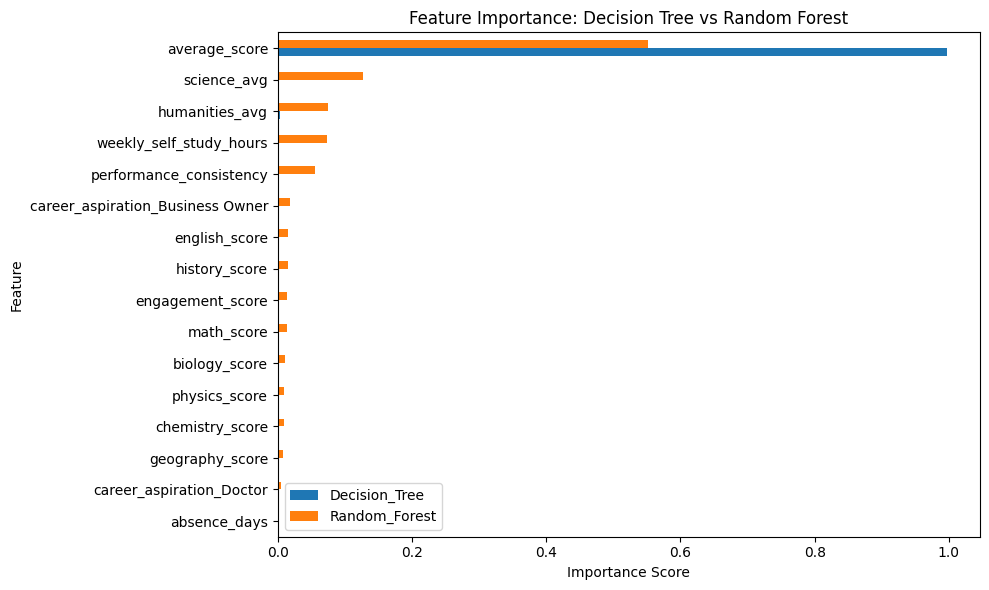

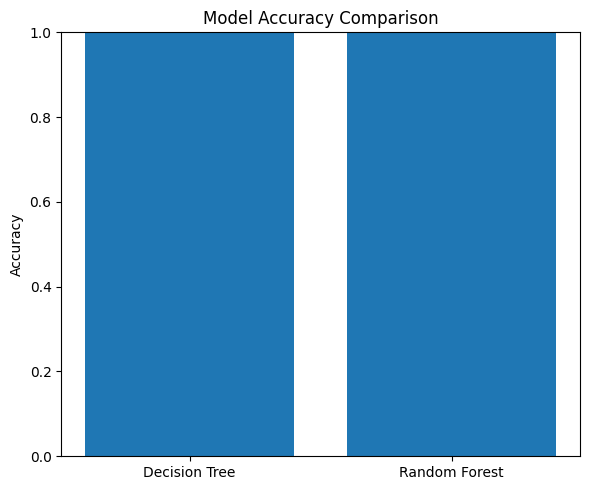

In [19]:
import matplotlib.pyplot as plt

# Load Models
dt_model, scaler, features, label_encoder = joblib.load("decision_tree_model.pkl")
rf_model, scaler, features, label_encoder = joblib.load("random_forest_model.pkl")

# Reload Data for Accuracy Testing
df = pd.read_csv("student_scores_selected_features.csv")

# Ensure performance_category exists (same logic)
if 'performance_category' not in df.columns:
    df['performance_category'] = pd.cut(
        df['average_score'],
        bins=[0, 60, 75, 100],
        labels=['Low', 'Average', 'Excellent'],
        include_lowest=True
    )

X = df[features]
y = label_encoder.transform(df['performance_category'])

X_scaled = scaler.transform(X)

# Predictions for accuracy comparison
dt_preds = dt_model.predict(X_scaled)
rf_preds = rf_model.predict(X_scaled)

dt_acc = (dt_preds == y).mean()
rf_acc = (rf_preds == y).mean()

# Feature Importance Comparison Chart

rf_importances = rf_model.feature_importances_
dt_importances = dt_model.feature_importances_

# Combine into DataFrame for nicer plotting
importance_df = pd.DataFrame({
    "Feature": features,
    "Decision_Tree": dt_importances,
    "Random_Forest": rf_importances
}).set_index("Feature")

# Plot Feature Importance
plt.figure(figsize=(10, 6))
importance_df.sort_values("Random_Forest", ascending=True).plot(kind="barh", figsize=(10, 6))
plt.title("Feature Importance: Decision Tree vs Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Model Accuracy Comparison Chart

plt.figure(figsize=(6, 5))
models = ["Decision Tree", "Random Forest"]
accuracies = [dt_acc, rf_acc]

plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()



=== Target Distribution ===
risk_label
0    1612
1     388
Name: count, dtype: int64

Using Features:
['weekly_self_study_hours', 'humanities_avg', 'science_avg', 'engagement_score', 'performance_consistency']

     DECISION TREE MODEL
Decision Tree Accuracy: 0.9725

              precision    recall  f1-score   support

 Not At Risk       1.00      0.97      0.98       322
     At Risk       0.88      1.00      0.93        78

    accuracy                           0.97       400
   macro avg       0.94      0.98      0.96       400
weighted avg       0.98      0.97      0.97       400

Decision Tree Confusion Matrix:
 [[311  11]
 [  0  78]]


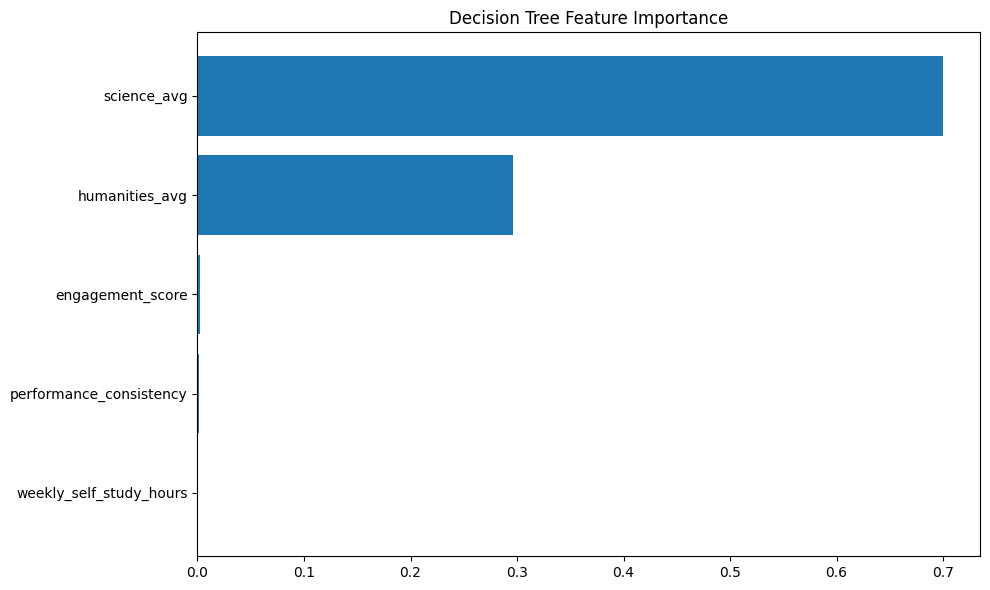

In [20]:
# At-Risk Prediction Models
# Decision Tree & Random Forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Load dataset
df = pd.read_csv("student_scores_selected_features.csv")

# Define risk label
threshold = max(60, df['average_score'].quantile(0.2))
df['risk_label'] = (df['average_score'] < threshold).astype(int)

print("\n=== Target Distribution ===")
print(df['risk_label'].value_counts())

# Feature selection
features = [
    'science_avg',
    'humanities_avg',
    'engagement_score',
    'performance_consistency',
    'weekly_self_study_hours'
]

# Add behavior and activity features
behavioral_features = [c for c in df.columns if any(
    keyword in c.lower() for keyword in ['participation', 'online', 'activity', 'behavior', 'attendance']
)]
features.extend(behavioral_features)

# Feature cleaning
features = list(set(features))
features = [f for f in features if f in df.columns]

print("\nUsing Features:")
print(features)

# Prepare data
X = df[features].copy()
y = df['risk_label']

X = pd.get_dummies(X, drop_first=True)
X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Decision Tree Model

print("\n==============================")
print("     DECISION TREE MODEL")
print("==============================")

dt = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train_scaled, y_train)

# Predict
dt_pred = dt.predict(X_test_scaled)

# Evaluation
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_acc:.4f}\n")
print(classification_report(y_test, dt_pred, target_names=["Not At Risk", "At Risk"]))

print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))

# Feature importance
dt_importances = dt.feature_importances_
dt_df = pd.DataFrame({"feature": X.columns, "importance": dt_importances}).sort_values("importance")

plt.figure(figsize=(10, 6))
plt.barh(dt_df["feature"], dt_df["importance"])
plt.title("Decision Tree Feature Importance")
plt.tight_layout()
plt.show()




       RANDOM FOREST MODEL
Random Forest Accuracy: 0.9900

              precision    recall  f1-score   support

 Not At Risk       0.99      0.99      0.99       322
     At Risk       0.97      0.97      0.97        78

    accuracy                           0.99       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400

Random Forest Confusion Matrix:
 [[320   2]
 [  2  76]]


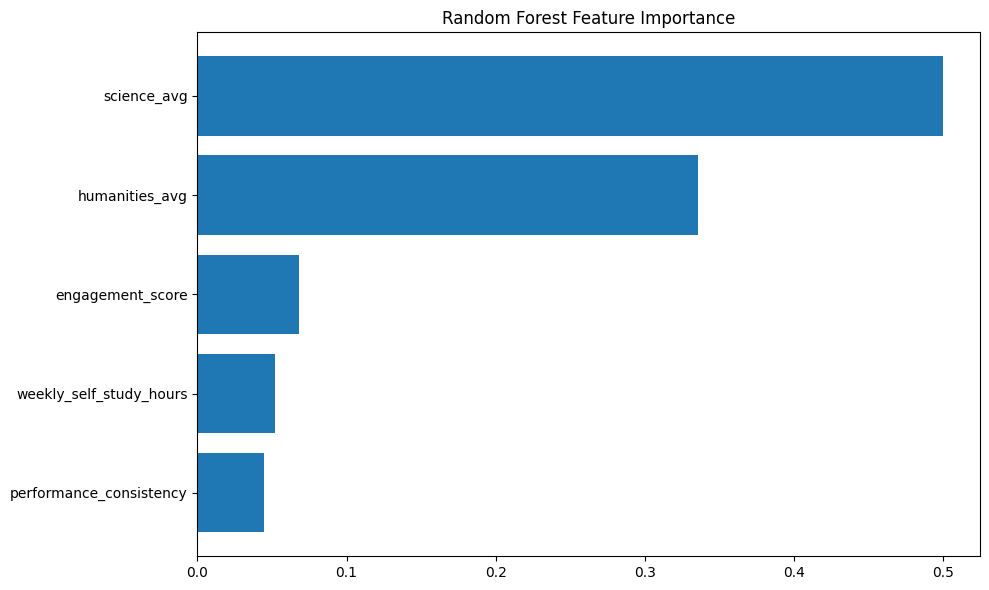

In [21]:
# Random Forest Model
print("\n==============================")
print("       RANDOM FOREST MODEL")
print("==============================")

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train_scaled, y_train)

rf_pred = rf.predict(X_test_scaled)

rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}\n")
print(classification_report(y_test, rf_pred, target_names=["Not At Risk", "At Risk"]))

print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# Feature importance
rf_importances = rf.feature_importances_
rf_df = pd.DataFrame({"feature": X.columns, "importance": rf_importances}).sort_values("importance")

plt.figure(figsize=(10, 6))
plt.barh(rf_df["feature"], rf_df["importance"])
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

In [22]:
# ============================
# SAVE MODELS
# ============================
import joblib

joblib.dump((dt, scaler, X.columns.tolist()), "decision_tree_atrisk.pkl")
joblib.dump((rf, scaler, X.columns.tolist()), "random_forest_atrisk.pkl")

print("\nModels saved as:")
print(" decision_tree_atrisk.pkl")
print(" random_forest_atrisk.pkl")


Models saved as:
 decision_tree_atrisk.pkl
 random_forest_atrisk.pkl
